In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.applications import Xception
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense,Flatten,BatchNormalization,Dropout,GlobalAveragePooling2D,Input

In [17]:
data = keras.utils.image_dataset_from_directory(
    directory = "/Users/shivendra/Desktop/train",
    labels ='inferred',
    batch_size = 64,
    image_size =(299,299)
)
Vdata = keras.utils.image_dataset_from_directory(
    directory ="/Users/shivendra/Desktop/Validate",
    labels ='inferred',
    batch_size = 64,
    image_size =(299,299)
)

Found 69999 files belonging to 2 classes.
Found 10000 files belonging to 2 classes.


In [18]:
def process(image,label):
    image = tf.cast(image/255.,tf.float32)
    return image,label
data = data.map(process)
Vdata = Vdata.map(process)

In [19]:
convBase = Xception(
    weights ='imagenet',
    include_top =False,
    input_shape =(299,299,3)
)

In [20]:
convBase.trainable = False

In [21]:
model = Model()

inputs = Input(shape=(299, 299, 3))
x = convBase(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.25)(x)
x = Dense(128, activation='relu')(x)
y = Dropout(0.25)(x)
outputs = Dense(1, activation='sigmoid')(y)
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 299, 299, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ xception (Functional)           │ (None, 10, 10, 2048)   │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_4      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 2048)           │         8,192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,427,241 (81.74 MB)

 Trainable params: 561,665 (2.14 MB)

 Non-trainable params: 20,865,576 (79.60 MB)

In [22]:
moHist = model.fit(data,epochs=5,validation_data=Vdata)

Epoch 1/5


1094/1094 ━━━━━━━━━━━━━━━━━━━━ 17016s 16s/step - accuracy: 0.9700 - loss: 0.0831 - val_accuracy: 0.9869 - val_loss: 0.0375
Epoch 2/5
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 23056s 21s/step - accuracy: 0.9900 - loss: 0.0311 - val_accuracy: 0.9912 - val_loss: 0.0266
Epoch 3/5
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 29943s 27s/step - accuracy: 0.9922 - loss: 0.0213 - val_accuracy: 0.9897 - val_loss: 0.0311
Epoch 4/5
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 17373s 16s/step - accuracy: 0.9929 - loss: 0.0201 - val_accuracy: 0.9908 - val_loss: 0.0284
Epoch 5/5
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 16988s 16s/step - accuracy: 0.9949 - loss: 0.0154 - val_accuracy: 0.9903 - val_loss: 0.0304


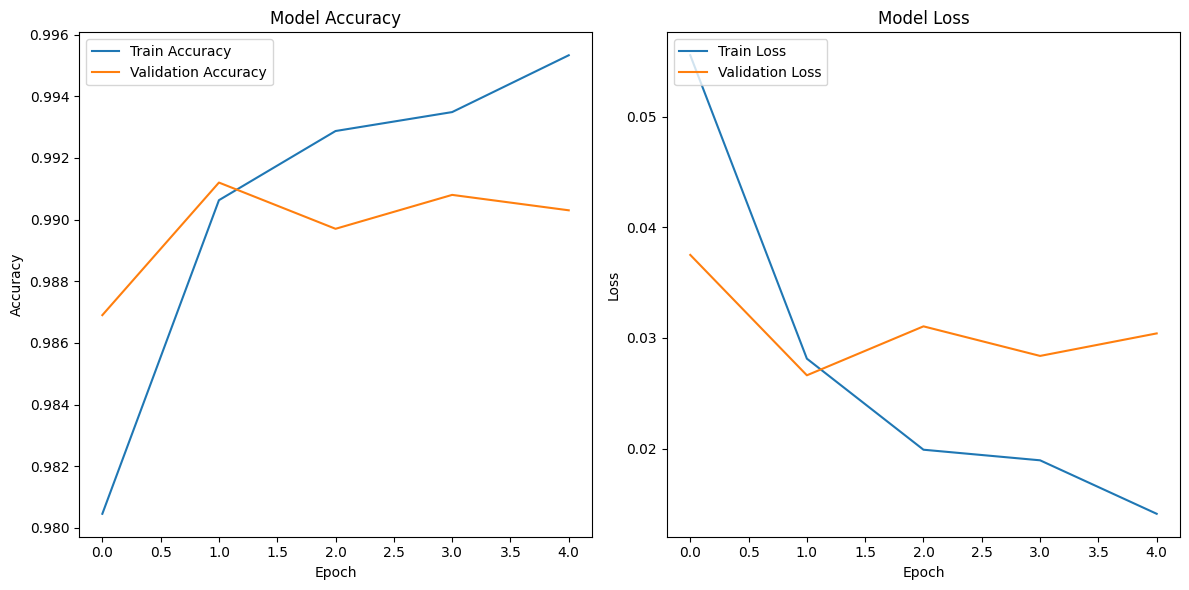

In [28]:
import matplotlib.pyplot as plt
# Assuming 'history' is your model's training history object
def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 6))
    
    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    
    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    
    plt.tight_layout()
    plt.show()

# Call this function with your history object
plot_training_history(moHist)


In [ ]:
model.save("Xception_model.h5")

In [5]:
mymod = keras.models.load_model("Xception_model.h5")

In [6]:
from keras.preprocessing import image
import cv2
import os
path="/Users/shivendra/Desktop/Testing data/imgs"
test_imgs= os.listdir(path)
y_true =[]
for img in test_imgs:
    if "Real" in img:
        y_true.append(1)
    elif "Fake" in img:
        y_true.append(0)
y_pred =[]
for i in range(len(test_imgs)):
    img = image.load_img(path + "/" + test_imgs[i])
    img = image.img_to_array(img)
    img = img/255
    img = cv2.resize(img,(299,299))
    result = mymod.predict(img.reshape(1,299,299,3))
    if(result>0.5):
        y_pred.append(1)
    else:
        y_pred.append(0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

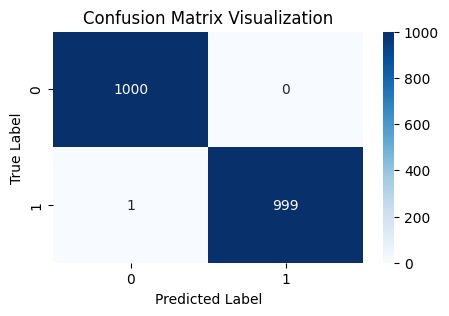

In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
y_pred = np.array(y_pred)
y_true = np.array(y_true)
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(5, 3))  
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Visualization')

plt.show()
